## Problem Statement:

We are a small startup focusing mainly on providing machine learning solutions in the European banking market. We work on a variety of problems including fraud detection, sentiment classification and customer intention prediction and classification.

We are interested in developing a robust machine learning system that leverages information coming from call center data.

Ultimately, we are looking for ways to improve the success rate for calls made to customers for any product that our clients offer. Towards this goal we are working on designing an ever evolving machine learning product that offers high success outcomes while offering interpretability for our clients to make informed decisions.

Data Description:

The data comes from direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.

Attributes:

age : age of customer (numeric)

job : type of job (categorical)

marital : marital status (categorical)

education (categorical)

default: has credit in default? (binary)

balance: average yearly balance, in euros (numeric)

housing: has a housing loan? (binary)

loan: has personal loan? (binary)

contact: contact communication type (categorical)

day: last contact day of the month (numeric)

month: last contact month of year (categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Output (desired target):

y - has the client subscribed to a term deposit? (binary)

Download Data:

https://drive.google.com/file/d/1EW-XMnGfxn-qzGtGPa3v_C63Yqj2aGf7

Goal(s):

Predict if the customer will subscribe (yes/no) to a term deposit (variable y)

Success Metric(s):

Hit %81 or above accuracy by evaluating with 5-fold cross validation and reporting the average performance score.

Bonus(es):

We are also interested in finding customers who are more likely to buy the investment product. Determine the segment(s) of customers our client should prioritize.

What makes the customers buy? Tell us which feature we should be focusing more on.


## 1. Load data

In [1]:
# Loading some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [2]:
# Load data into the Jupyter notebook
term_deposit = pd.read_csv('term-deposit-marketing-2020.csv')

In [3]:
# Examining the first few rows of the dataset
term_deposit.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


It is clear from the dataset that for any column in which information is not available it is listed as unknown rather than None value. So we need to convert all values with unknown to NaN.

In [4]:
# Replace 'unknown' with NaN (not a number) across the entire DataFrame
term_deposit.replace('unknown', np.nan, inplace=True)

In [5]:
# Count the non-empty rows for each column in the DataFrame
term_deposit.count()

age          40000
job          39765
marital      40000
education    38469
default      40000
balance      40000
housing      40000
loan         40000
contact      27235
day          40000
month        40000
duration     40000
campaign     40000
y            40000
dtype: int64

In [6]:
# Examine the data types of the DataFrame
term_deposit.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object

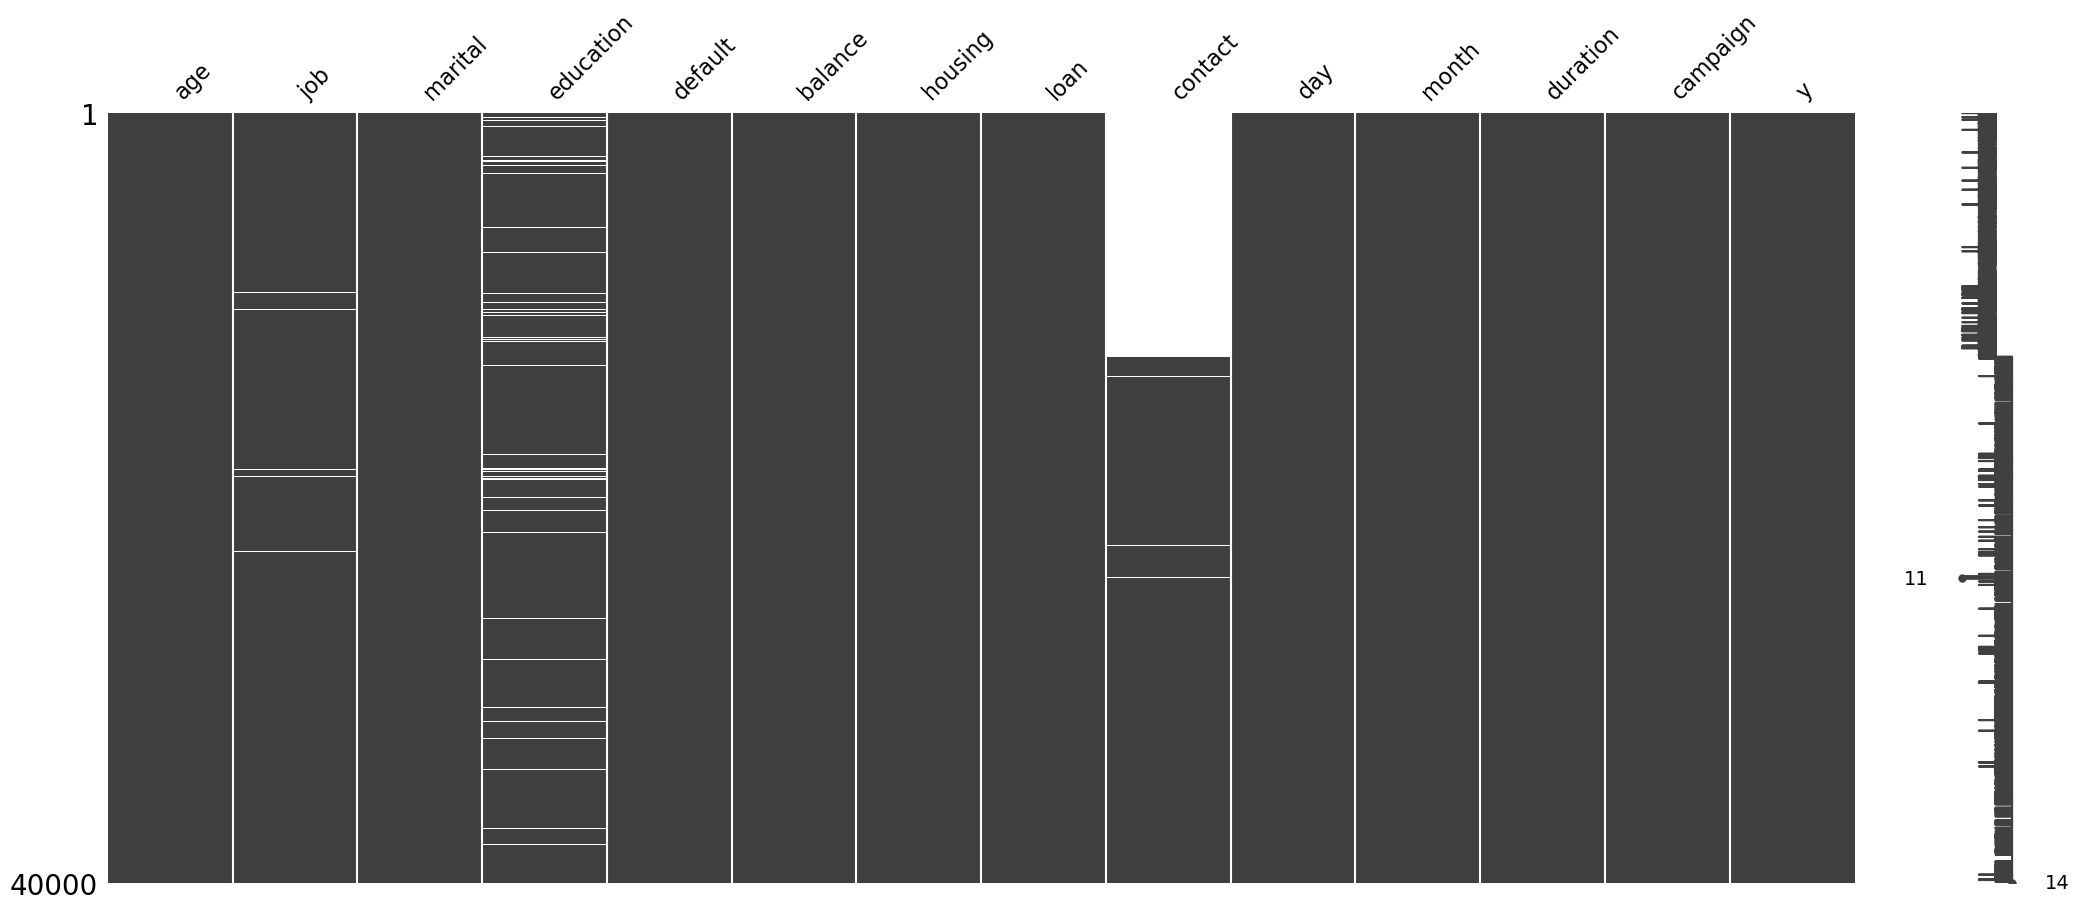

In [7]:

from IPython.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

 #visualizing the missing data
import missingno as msno
msno.matrix(term_deposit)
plt.show()


As the plot above highlights there are missing values in our data with the contact column having several missing values. Edication and job also have a few misssing values.

In [7]:
# Day is a categorical varibale so we will convert it as such
term_deposit['day'] = term_deposit['day'].astype('str')

## 2. Exploratory data analysis

Let is explore the distributions of the numerical and categorical variables in the data.
We have age, balance, duration and campaign are numerical variables in our data and the rest are caegorical variables

### 2.1 Numerical variables

In [9]:
# Get the descriptive satistics for each variable
groupded_td = term_deposit.groupby("y")

custom_summary = groupded_td.agg({
    'age': ['mean', 'std', 'min', 'max', ('range', lambda x: x.max() - x.min()),  'median'],  
    'balance':['mean', 'std', 'min', 'max', ('range', lambda x: x.max() - x.min()),  'median'],  
    'duration': ['mean', 'std', 'min', 'max', ('range', lambda x: x.max() - x.min()),  'median'],
    'campaign': ['mean', 'std', 'min', 'max', ('range', lambda x: x.max() - x.min()),  'median']
})

# Display the custom summary
print(custom_summary.T)


y                           no           yes
age      mean        40.599208     39.844959
         std          9.525450     11.001984
         min         19.000000     19.000000
         max         94.000000     95.000000
         range       75.000000     76.000000
         median      39.000000     37.000000
balance  mean      1249.752533   1588.495856
         std       2900.722436   2924.894429
         min      -8019.000000  -3058.000000
         max     102127.000000  45248.000000
         range   110146.000000  48306.000000
         median     395.000000    620.000000
duration mean       221.408042    682.958564
         std        206.360022    431.287174
         min          0.000000      8.000000
         max       4918.000000   3881.000000
         range     4918.000000   3873.000000
         median     164.000000    629.000000
campaign mean         2.918688      2.414365
         std          3.298031      2.306015
         min          1.000000      1.000000
         m

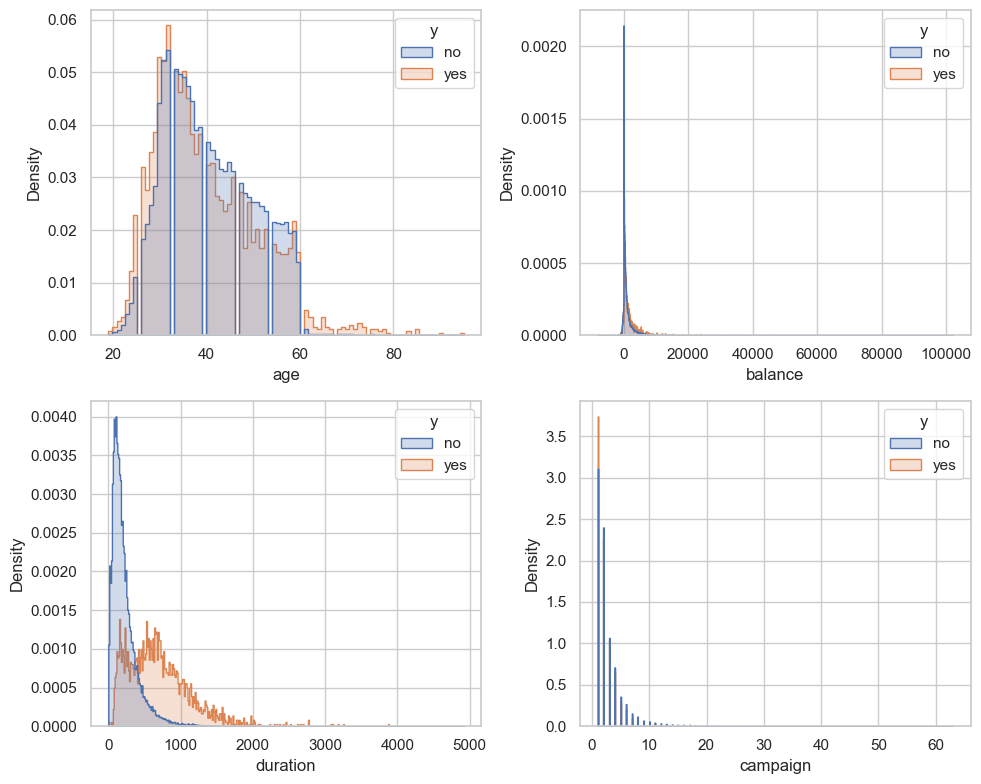

In [11]:
# Plot a histogram of the numerical columns in the DataFrame (Ratio type varibles)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")  
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
sns.histplot(data=term_deposit, x='age', hue='y', element='step', stat='density', common_norm=False)
plt.subplot(2, 2, 2)
sns.histplot(data=term_deposit, x='balance', hue='y', element='step', stat='density', common_norm=False)
plt.subplot(2, 2, 3)
sns.histplot(data=term_deposit, x='duration', hue='y', element='step', stat='density', common_norm=False)
plt.subplot(2, 2, 4)
sns.histplot(data=term_deposit, x='campaign', hue='y', element='step', stat='density', common_norm=False)
plt.tight_layout()
plt.show()

From the chart above it is clear that older people are more likely to get a term deposit with people> age 60 extremely likely to do so. Similarly, the last contact duration may indicate to be a predicitve variable with higher contact duration having leading to people getting a term deposit.

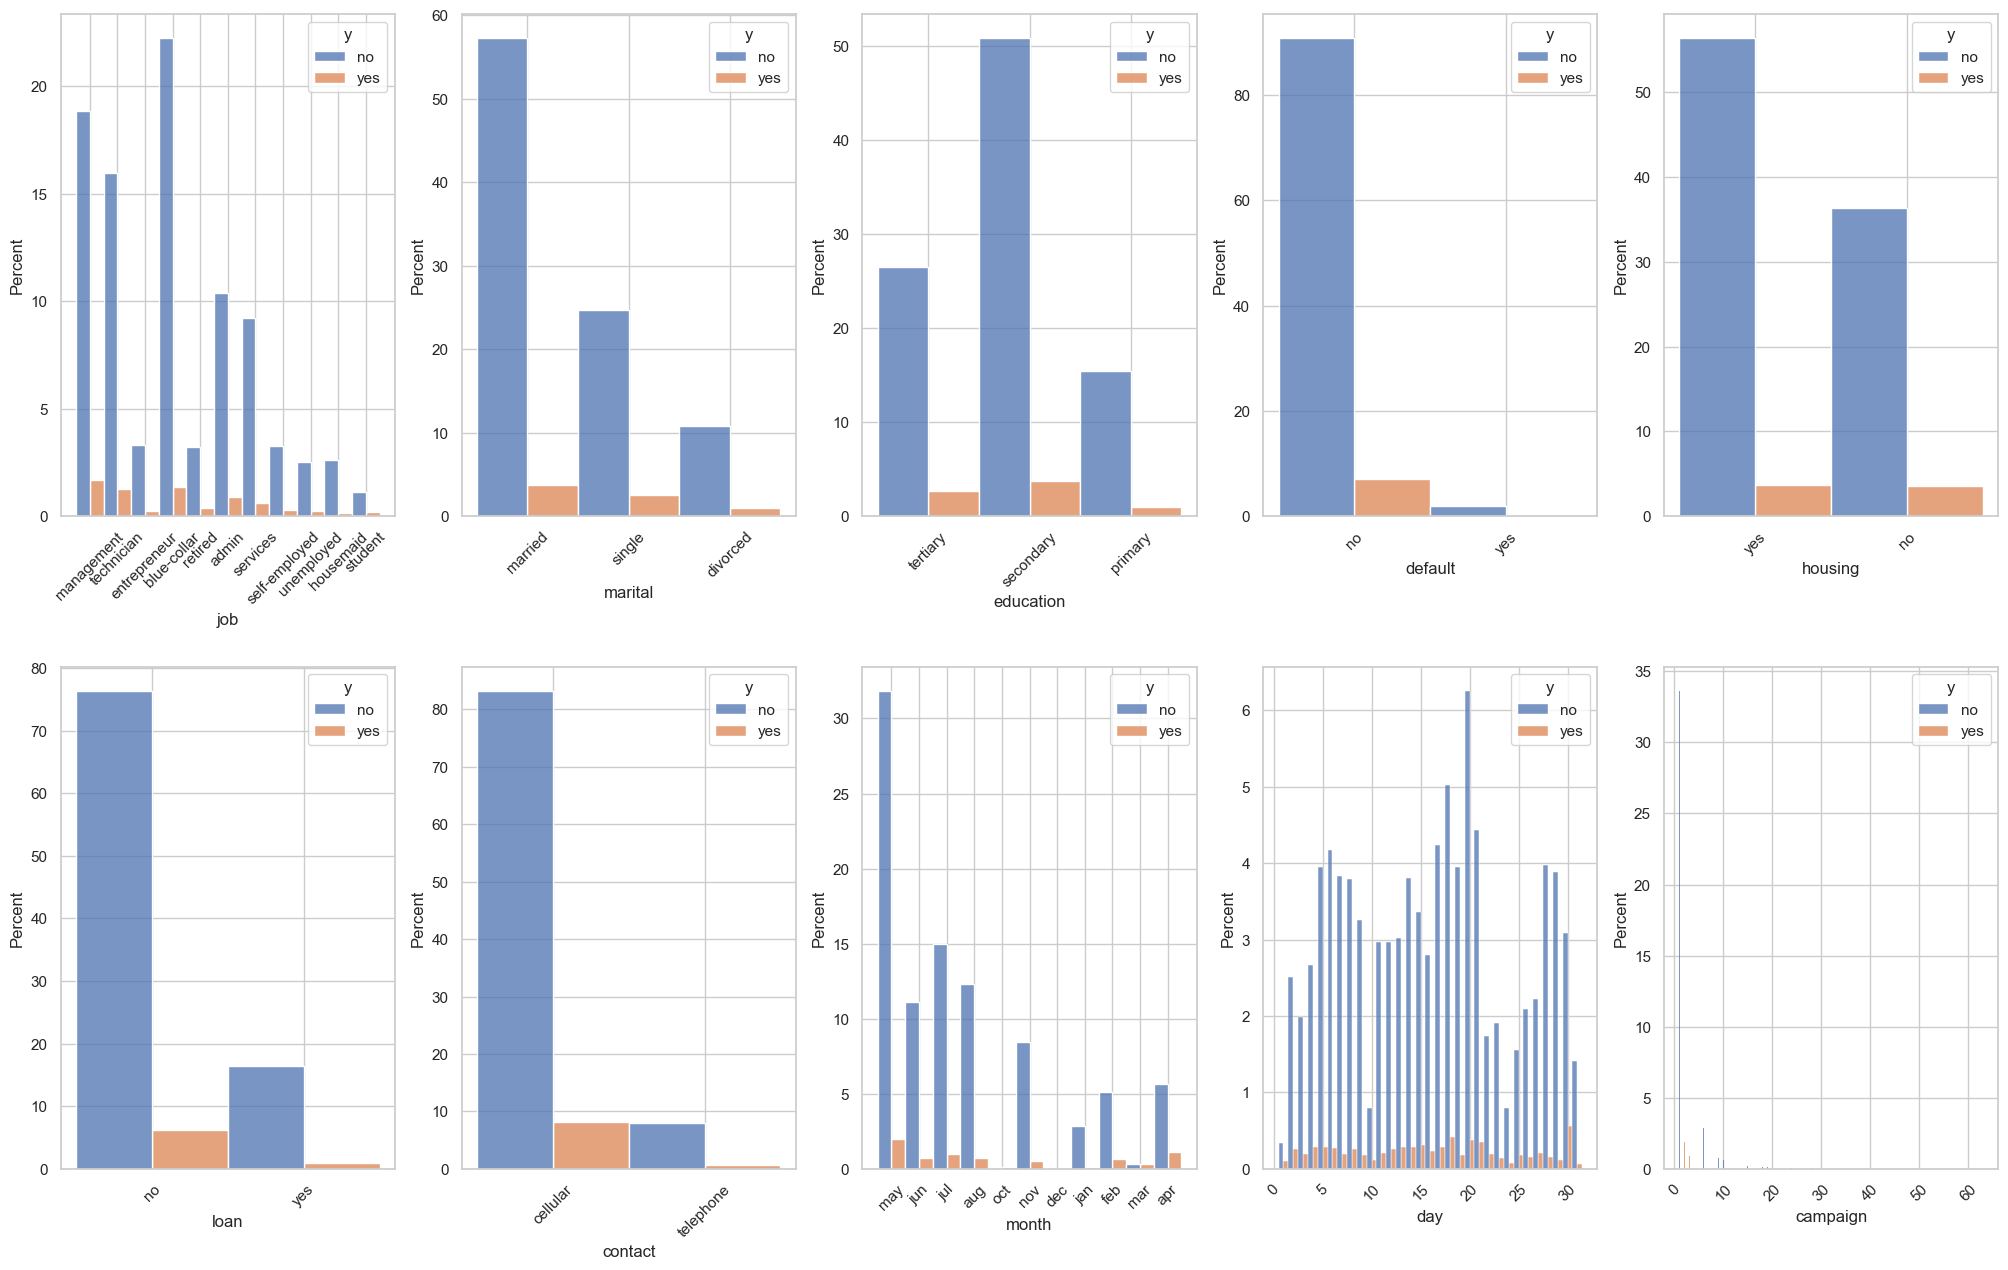

In [116]:
# Plot a barchart of the categorical columns in the DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(2, 5, figsize=(25, 15))
sns.histplot(x='job', data=term_deposit, ax=axs[0, 0], hue = "y", stat= "percent", multiple = "dodge" )
sns.histplot(x='marital', data=term_deposit, ax=axs[0, 1], hue = "y" , stat="percent", multiple = "dodge")
sns.histplot(x='education', data=term_deposit, ax=axs[0, 2], hue = "y", stat="percent", multiple = "dodge")
sns.histplot(x='default', data=term_deposit, ax=axs[0, 3], hue = "y", stat= "percent",multiple = "dodge")
sns.histplot(x='housing', data=term_deposit, ax=axs[0, 4], hue = "y", stat= "percent", multiple = "dodge")
sns.histplot(x='loan', data=term_deposit, ax=axs[1, 0], hue = "y", stat= "percent", multiple = "dodge")
sns.histplot(x='contact', data=term_deposit, ax=axs[1, 1], hue = "y",stat= "percent", multiple = "dodge")
sns.histplot(x='month', data=term_deposit, ax=axs[1, 2], hue = "y", stat= "percent", multiple = "dodge")
sns.histplot(x='day', data=term_deposit, ax=axs[1, 3], hue = "y", stat= "percent", multiple = "dodge")
sns.histplot(x='campaign', data=term_deposit, ax=axs[1, 4], hue = "y", stat= "percent", multiple = "dodge")
axs[0, 0].tick_params(axis='x', rotation=45, labelright=True)
axs[0, 1].tick_params(axis='x', rotation=45, labelright=True)
axs[0, 2].tick_params(axis='x', rotation=45, labelright=True)
axs[0, 3].tick_params(axis='x', rotation=45, labelright=True)
axs[0, 4].tick_params(axis='x', rotation=45, labelright=True)
axs[1, 0].tick_params(axis='x', rotation=45, labelright=True)
axs[1, 1].tick_params(axis='x', rotation=45, labelright=True)
axs[1, 2].tick_params(axis='x', rotation=45, labelright=True)
axs[1, 3].tick_params(axis='x', rotation=45, labelright=True)
axs[1, 4].tick_params(axis='x', rotation=45, labelright=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)
plt.show()

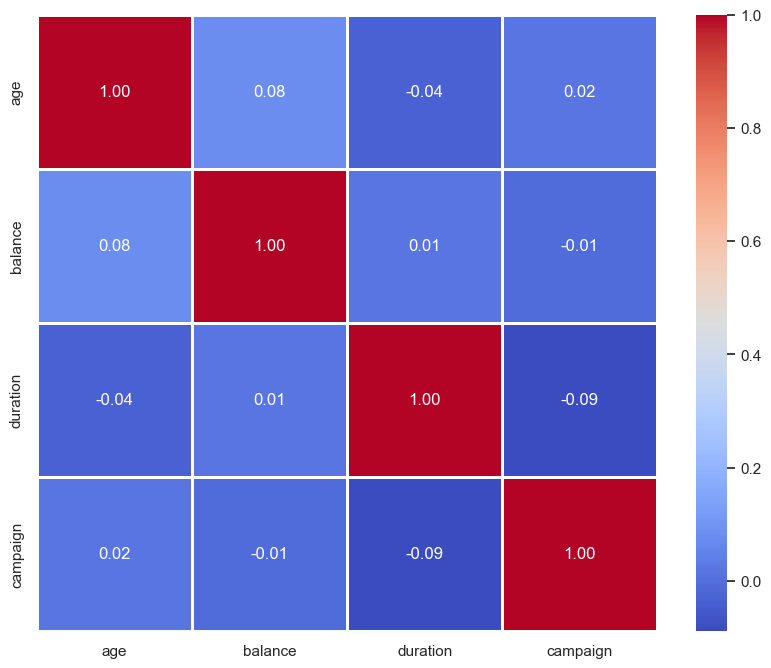

In [12]:
# Plot the correlation matrix of the numerical columns in the DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(term_deposit[['age', 'balance', 'duration', 'campaign']].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.show()

The numerical cariables do not seem to have large correlations, indicating that each of these varibles can add a unique piece of information.

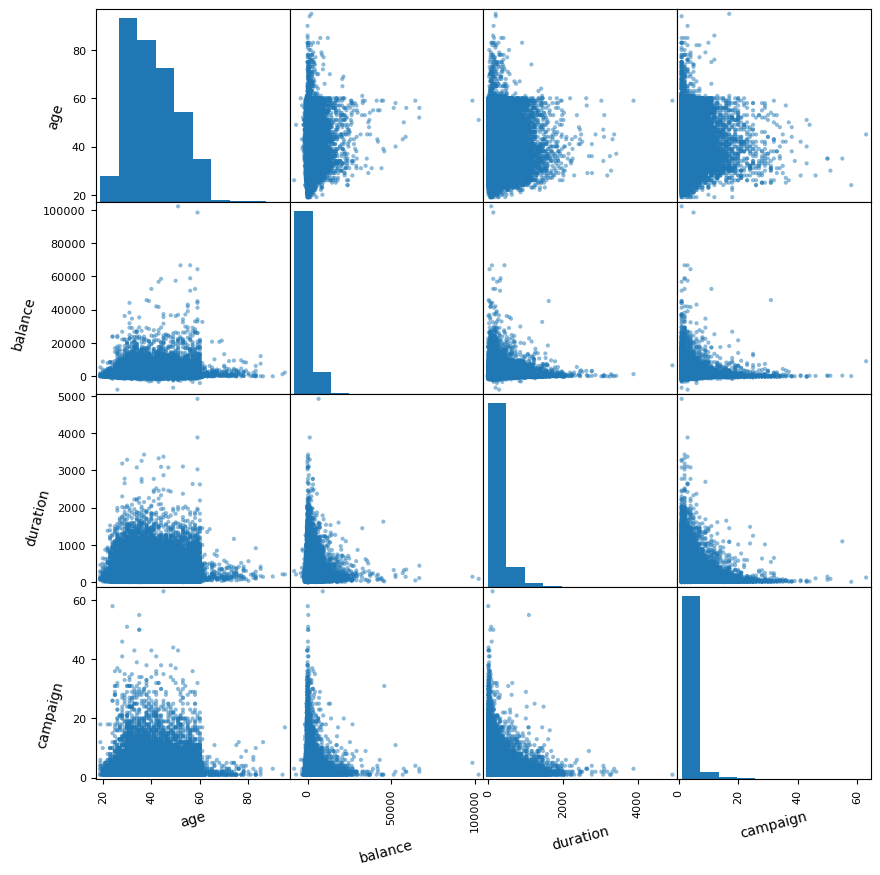

In [46]:
# Scatter plot matrix of all the features

axes = pd.plotting.scatter_matrix(term_deposit[['age', 'balance', 'duration', 'campaign']], figsize=(10,10))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(15)
    ax.yaxis.label.set_rotation(75)
    ax.yaxis.label.set_ha('right')


plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

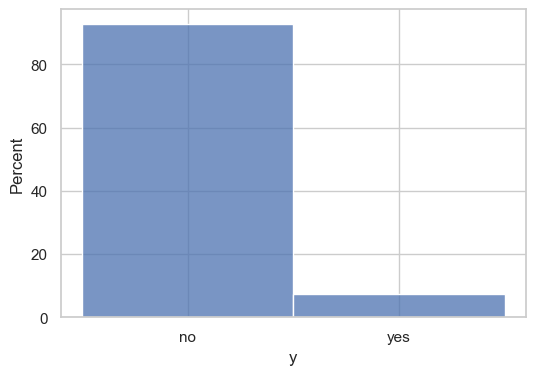

In [13]:
# Plot the distribution of the target variable
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.histplot(x='y', data=term_deposit, stat='percent')
plt.show()


Obviously there are a lot more no's than yes as expected as most clients do not subscribe to the term deposit. Hence these should factor into our classifiers and classification metrics.

## 3. Dealing with missing values

Since there are a few missing values for some of the variables, we can explore 3 strategies to deal with it, 
(i) Drop the na rows
(ii) Build classifiers that can handle missing values
(iii) Use methods to impute the missing values and then build a classifier model

### 3.1 Drop the na values


In [13]:
# Checking the missing values for all varables whent the target variables is yes and no
term_deposit_yes = term_deposit[term_deposit['y'] == 'yes']
term_deposit_no = term_deposit[term_deposit['y'] == 'no']
print(term_deposit_yes.isnull().sum()/len(term_deposit_yes))

age          0.000000
job          0.005870
marital      0.000000
education    0.033149
default      0.000000
balance      0.000000
housing      0.000000
loan         0.000000
contact      0.171616
day          0.000000
month        0.000000
duration     0.000000
campaign     0.000000
y            0.000000
dtype: float64


In [14]:
print(term_deposit_no.isnull().sum()/len(term_deposit_no))

age          0.000000
job          0.005875
marital      0.000000
education    0.038675
default      0.000000
balance      0.000000
housing      0.000000
loan         0.000000
contact      0.330638
day          0.000000
month        0.000000
duration     0.000000
campaign     0.000000
y            0.000000
dtype: float64


In [15]:
# If  we drop the missing values, we will lose a lot of data

print("Proportion of rows  with no null no values" , term_deposit_no.notnull().all(axis=1).sum()/len(term_deposit_no))
print("Proportion of rows with non no null yes values", term_deposit_yes.notnull().all(axis=1).sum()/len(term_deposit_yes))

Proportion of rows  with no null no values 0.6462915049590341
Proportion of rows with non no null yes values 0.799378453038674


If we drop the missing value then we will lose 20% to 35% of the data. Furthermore since the vast majority of missing values corrrespond to a single column that takes just 2 values. It would be better to drop the column first and then drop any missing values from other columns

In [11]:
# Prepare the data for the modeling

# Split the data into the target variable and the feature variables
term_deposit['y'] = term_deposit['y'].map({'yes': 1, 'no': 0})
y= term_deposit['y']
X= term_deposit.drop(columns='y')

# Define categorical and numerical features
X['day'] = X['day'].astype('object')
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()


#  Shufle the data
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=42)

In [182]:
# Building a simple predictive model (Random Forest Classifier)
# Preprocessing the data
# Drop the 'contact' column from the DataFrame
# Convert categorical columns to dummy variables using one-hot encoding and scale the numerical columns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Drop the 'contact' column from the DataFrame
X1 = term_deposit.drop(columns='contact')
# Drop the rows with missing values
X1 = X1.dropna()
y1= X1['y']
X1= X1.drop(columns='y')
categorical_features1 = X1.select_dtypes(include=['object']).columns.tolist()

# Preprocessing for numerical data and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('numfeat', StandardScaler(), numerical_features),
        ('catfeat', OneHotEncoder(handle_unknown='ignore'), categorical_features1)
    ]
)

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(n_estimators=500))])


# Evaluate the model using 5-fold cross-validation
scores = cross_val_score(model, X1, y1, cv=5, scoring = 'balanced_accuracy') 

print("Mean 5-fold cross-validation score: {:.2f}".format(scores.mean()))

Mean 5-fold cross-validation score: 0.43


<IPython.core.display.Javascript object>

In [10]:
# Lets build a custom classifier that will allow us to set the threshold for the Random Forest Classifier model. This will allow us to tune the threshold to maximize the accuracy of the model.
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from scipy.stats import uniform

class CustomerModelRF(BaseEstimator, ClassifierMixin):
    
    def __init__(self, n_estimators = 300, max_features = "sqrt", threshold = 0.5):
        self.threshold = threshold
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.rf = RandomForestClassifier(n_estimators =self.n_estimators, max_features = self.max_features)

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self = self.rf.fit(X, y)
        return(self)

    
    def predict(self, X):
        return((self.rf.predict_proba(X)[:,1] > self.threshold).astype(int))
    
    def predict_proba(self, X):
        probs = self.rf.predict_proba(X)*np.array([1-self.threshold, self.threshold])
        return(probs/probs.sum(axis=1, keepdims=True))
    
    
# Drop the 'contact' column from the DataFrame
X1 = term_deposit.drop(columns='contact')
# Drop the rows with missing values
X1 = X1.dropna()
y1= X1['y']
X1= X1.drop(columns='y')
categorical_features1 = X1.select_dtypes(include=['object']).columns.tolist()

# Preprocessing for numerical data and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('numfeat', StandardScaler(), numerical_features),
        ('catfeat', OneHotEncoder(handle_unknown='ignore'), categorical_features1)
    ]
)

# Define the model pipeline
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                        ('RFmdl', CustomerModelRF())])   


param_grid_rf = {'RFmdl__threshold': uniform(0.00, 0.15),
                 'RFmdl__max_features':["sqrt", "log2", None]} #  Max number of features to consider when looking for the best split


rs_est_rf_td = RandomizedSearchCV(pipeline_rf, param_grid_rf,  cv=5, n_jobs=2, verbose=1, random_state=0, n_iter=60, scoring='balanced_accuracy')

print("Mean 5-fold cross-validation score: {:.2f}".format(np.mean(cross_val_score(rs_est_rf_td, X1, y1, cv=5, n_jobs=-1))))

Mean 5-fold cross-validation score: 0.45


In [183]:
# Implementing a Logisisitc Regression model with parameter tuning to predict the target variable
# Lets build a custom classifier that will allow us to set the threshold for the LR Classifier model. This will allow us to tune the threshold to maximize the accuracy of the model.
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from scipy.stats import loguniform, uniform

class CustomerModelLR(BaseEstimator, ClassifierMixin):
    
    def __init__(self, C=1, penalty ='l1', threshold = 0.5):
        self.C = C
        self.threshold = threshold
        self.penalty = penalty
        self.lr = LogisticRegression(C=self.C, penalty = self.penalty, solver='liblinear')

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self = self.lr.fit(X, y)
        return(self)

    
    def predict(self, X):
        return((self.lr.predict_proba(X)[:,1] > self.threshold).astype(int))
    
    def predict_proba(self, X):
        probs = self.lr.predict_proba(X)*np.array([1-self.threshold, self.threshold])
        return(probs/probs.sum(axis=1, keepdims=True))
    
    
# Drop the 'contact' column from the DataFrame
X1 = term_deposit.drop(columns='contact')
# Drop the rows with missing values
X1 = X1.dropna()
y1= X1['y']
X1= X1.drop(columns='y')
categorical_features1 = X1.select_dtypes(include=['object']).columns.tolist()

# Preprocessing for numerical data and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('numfeat', StandardScaler(), numerical_features),
        ('catfeat', OneHotEncoder(handle_unknown='ignore'), categorical_features1)
    ]
)

# Define the model pipeline
pipeline_lr = Pipeline([("preproceesor", preprocessor),
                 ("logregmdl", CustomerModelLR())])

param_grid_lr = {'logregmdl__C':  loguniform(1e-5, 1e3), 
                 'logregmdl__penalty': ['l1', 'l2'],
                 'logregmdl__threshold': uniform(0.0, 0.15)}



rs_est_lr_td = RandomizedSearchCV(pipeline_lr, param_grid_lr,  cv=5, n_jobs=2, verbose=1, random_state=0, n_iter=100, scoring='balanced_accuracy')

print("Mean 5-fold cross-validation score: {:.2f}".format(np.mean(cross_val_score(rs_est_lr_td, X1, y1, cv=5, n_jobs=-1))))

Mean 5-fold cross-validation score: 0.42


In [184]:
# Implementing a MLP model with parameter tuning to predict the target variable
# Lets build a custom classifier that will allow us to set the threshold for the MLP Classifier model. This will allow us to tune the threshold to maximize the accuracy of the model.
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from scipy.stats import loguniform, uniform

class CustomerModelMLP(BaseEstimator, ClassifierMixin):
    
    def __init__(self, hidden_layer_sizes= (50,), alpha =0.0001, max_iter=400, threshold = 0.5):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.alpha = alpha
        self.max_iter = max_iter
        self.threshold = threshold
        self.mlp = MLPClassifier(hidden_layer_sizes=self.hidden_layer_sizes,  alpha = self.alpha, max_iter=self.max_iter, activation='relu', solver='adam', early_stopping= True)
                            

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self = self.mlp.fit(X, y)
        return(self)

    
    def predict(self, X):
        return((self.mlp.predict_proba(X)[:,1] > self.threshold).astype(int))
    
    def predict_proba(self, X):
        probs = self.mlp.predict_proba(X)*np.array([1-self.threshold, self.threshold])
        return(probs/probs.sum(axis=1, keepdims=True))
    
    
# Drop the 'contact' column from the DataFrame
X1 = term_deposit.drop(columns='contact')
# Drop the rows with missing values
X1 = X1.dropna()
y1= X1['y']
X1= X1.drop(columns='y')
categorical_features1 = X1.select_dtypes(include=['object']).columns.tolist()

# Preprocessing for numerical data and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('numfeat', StandardScaler(), numerical_features),
        ('catfeat', OneHotEncoder(handle_unknown='ignore'), categorical_features1)
    ]
)

# Define the model pipeline
pipeline_mlp = Pipeline([("preproceesor", preprocessor),
                 ("mlpmdl",  CustomerModelMLP())])

param_grid_mlp = {'mlpmdl__alpha':  loguniform(1e-3, 1e3), 
                 'mlpmdl__hidden_layer_sizes': [(5, 2), (10, 5), (20, 5)],
                 'mlpmdl__threshold': uniform(0.00, 0.15)}



rs_est_mlp_td = RandomizedSearchCV(pipeline_mlp, param_grid_mlp,  cv=5, n_jobs=2, verbose=1, random_state=0, n_iter=60, scoring='balanced_accuracy')
print("Mean 5-fold cross-validation score: {:.2f}".format(np.mean(cross_val_score(rs_est_mlp_td, X1, y1, cv=5, n_jobs=-1))))

Mean 5-fold cross-validation score: 0.54


In [122]:
# Implementing a RBF-kernel SVC model with parameter tuning to predict the target variable
# Lets build a custom classifier that will allow us to set the threshold for the SVC model. This will allow us to tune the threshold to maximize the accuracy of the model.
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from scipy.stats import loguniform, uniform

class CustomerModelSVC(BaseEstimator, ClassifierMixin):
    
    def __init__(self, C=1, gamma ='scale', threshold = 0.5):
        self.C = C
        self.threshold = threshold
        self.gamma = gamma
        self.svc = SVC(C=self.C, gamma = self.gamma, kernel='rbf', probability=True)

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self = self.svc.fit(X, y)
        return(self)

    
    def predict(self, X):
        return((self.svc.predict_proba(X)[:,1] > self.threshold).astype(int))
    
    def predict_proba(self, X):
        probs = self.svc.predict_proba(X)*np.array([1-self.threshold, self.threshold])
        return(probs/probs.sum(axis=1, keepdims=True))
    
    
# Drop the 'contact' column from the DataFrame
X1 = term_deposit.drop(columns='contact')
# Drop the rows with missing values
X1 = X1.dropna()
y1= X1['y']
X1= X1.drop(columns='y')
categorical_features1 = X1.select_dtypes(include=['object']).columns.tolist()

# Preprocessing for numerical data and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('numfeat', StandardScaler(), numerical_features),
        ('catfeat', OneHotEncoder(handle_unknown='ignore'), categorical_features1)
    ]
)

# Define the model pipeline
pipeline_svc = Pipeline([("preproceesor", preprocessor),
                 ("svcmdl", CustomerModelSVC())])

param_grid_svc = {'svcmdl__C':  loguniform(1e-3 ,1e3), 
                 'svcmdl__gamma': loguniform(1e-2, 1e3), 
                 'svcmdl__threshold': uniform(0.0, 0.15)}



rs_est_svc_td = RandomizedSearchCV(pipeline_svc, param_grid_svc,  cv=5, n_jobs=2, verbose=1, random_state=0, n_iter=100, scoring='balanced_accuracy')

print("Mean 5-fold cross-validation score: {:.2f}".format(np.mean(cross_val_score(rs_est_svc_td, X1, y1, cv=5, n_jobs=-1))))

Mean 5-fold cross-validation score: 0.44


### 3.2  Classifiers  that can internally handle missing values
Now we will use a few classifiers than can handle missing values, including Random Forest, XGBoost, and CatBoost. All of these classifiers can inherently handle missing values.

In [185]:
# Lets build a custom classifier that will allow us to set the threshold for the Random Forest Classifier model. This will allow us to tune the threshold to maximize the accuracy of the model.
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from scipy.stats import uniform

class CustomerModelRF(BaseEstimator, ClassifierMixin):
    
    def __init__(self, n_estimators = 300, max_features = "sqrt", threshold = 0.5):
        self.threshold = threshold
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.rf = RandomForestClassifier(n_estimators =self.n_estimators, max_features = self.max_features)

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self = self.rf.fit(X, y)
        return(self)

    
    def predict(self, X):
        return((self.rf.predict_proba(X)[:,1] > self.threshold).astype(int))
    
    def predict_proba(self, X):
        probs = self.rf.predict_proba(X)*np.array([1-self.threshold, self.threshold])
        return(probs/probs.sum(axis=1, keepdims=True))
    

# Preprocessing for numerical data and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('numfeat', StandardScaler(), numerical_features),
        ('catfeat', OneHotEncoder(handle_unknown='ignore'), categorical_features1)
    ]
)

# Define the model pipeline
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                        ('RFmdl', CustomerModelRF())])   


param_grid_rf = {'RFmdl__threshold': uniform(0.00, 0.15),
                 'RFmdl__max_features':["sqrt", "log2", None]} #  Max number of features to consider when looking for the best split


rs_est_rf_td = RandomizedSearchCV(pipeline_rf, param_grid_rf,  cv=5, n_jobs=2, verbose=1, random_state=0, n_iter=45, scoring='balanced_accuracy')

print("Mean 5-fold cross-validation score: {:.2f}".format(np.mean(cross_val_score(rs_est_rf_td, X, y, cv=5, n_jobs=-1))))

Mean 5-fold cross-validation score: 0.85


In [41]:
# Implementing CatBoost Classifier as it achieves good performance while providing estimates of classifier performance

from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from scipy.stats import loguniform, uniform

cat_indices =list(range(len(categorical_features))) # In the pipeline after data transformation, the first set of columns would be categorical

# Preprocessing for numerical data and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('catfeat', 'passthrough', categorical_features),
        ('numfeat', StandardScaler(), numerical_features),

    ]
)
pipe_cb = Pipeline([("preproceesor",  preprocessor),
                 ("CBmdl", CatBoostClassifier(
                            iterations = 2,
                           learning_rate=0.4,
                           depth=2, verbose=False,        
                            cat_features=cat_indices))])

X2= X
X2[categorical_features] = X2[categorical_features].fillna('missing')

param_grid_cb ={
    'CBmdl__iterations': [200, 500],
    'CBmdl__learning_rate': [0.1, 0.3, 0.5, 0.7],
    'CBmdl__depth': [2, 5, 10]}

gs_cb_best = GridSearchCV(pipe_cb, param_grid=param_grid_cb, cv=5, n_jobs=2, scoring='balanced_accuracy')
print("Mean 5-fold cross-validation score: {:.2f}".format(np.mean(cross_val_score(gs_cb_best, X2, y, cv=5, n_jobs=-1))))



In [ ]:
# Lets build a custom classifier that will allow us to set the threshold for the CatBoost Classifier model. This will allow us to tune the threshold to maximize the accuracy of the model.
from sklearn.base import BaseEstimator, ClassifierMixin
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

class CustomerModelCB(BaseEstimator, ClassifierMixin):
    
    def __init__(self, iterations= 5, learning_rate = 0.4, depth = 2, threshold = 0.5, cat_indices = None):
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.depth = depth
        self.threshold = threshold
        self.cat_indices = cat_indices
        self.cb = CatBoostClassifier(iterations=self.iterations, learning_rate = self.learning_rate, depth = self.depth, cat_features=cat_indices, verbose = False, )


    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self = self.cb.fit(X, y)
        return(self)

    
    def predict(self, X):
        return((self.cb.predict_proba(X)[:,1] > self.threshold).astype(int))
    
    def predict_proba(self, X):
        probs = self.cb.predict_proba(X)*np.array([1-self.threshold, self.threshold])
        return(probs/probs.sum(axis=1, keepdims=True))

cat_indices =list(range(len(categorical_features))) # In the pipeline after data transformation, the first set of columns would be categorical

# Preprocessing for numerical data and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('catfeat', 'passthrough', categorical_features),
        ('numfeat', StandardScaler(), numerical_features),

    ]
)
pipeline_cb = Pipeline([("preproceesor",  preprocessor),
                 ("CBmdl", CustomerModelCB(
                            iterations = 2,
                           learning_rate=0.4,
                           depth=2, threshold = 0.5,       
                            cat_indices=cat_indices))])

X2= X
X2[categorical_features] = X2[categorical_features].fillna('missing')

# Perform hyperparameter search

param_grid_cb ={
    'CBmdl__iterations': [200, 500],
    'CBmdl__learning_rate': [0.1, 0.3, 0.5, 0.7],
    'CBmdl__depth': [2, 5, 10],
    'CBmdl__threshold': uniform(0.00, 0.15)}


rs_est_cb_td = RandomizedSearchCV(pipeline_cb, param_grid_cb,  cv=5, n_jobs=2, verbose=1, random_state=0, n_iter=45, scoring='balanced_accuracy')
print("Mean 5-fold cross-validation score: {:.2f}".format(np.mean(cross_val_score(rs_est_cb_td, X2, y, cv=5, n_jobs=-1))))

Mean 5-fold cross-validation score: 0.50


In [189]:
# Lets build a custom classifier that will allow us to set the threshold for the XGBoost Classifier model. This will allow us to tune the threshold to maximize the accuracy of the model.
from sklearn.base import BaseEstimator, ClassifierMixin
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

class CustomerModelXGB(BaseEstimator, ClassifierMixin):
    
    def __init__(self, n_estimators= 5, learning_rate = 0.4, max_depth = 4, threshold = 0.5):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.threshold = threshold
        self.xgb = XGBClassifier(n_estimators=self.n_estimators, learning_rate = self.learning_rate, max_depth = self.max_depth, use_label_encoder=False, eval_metric='logloss', n_jobs= -1)


    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self = self.xgb.fit(X, y)
        return(self)

    
    def predict(self, X):
        return((self.xgb.predict_proba(X)[:,1] > self.threshold).astype(int))
    
    def predict_proba(self, X):
        probs = self.xgb.predict_proba(X)*np.array([1-self.threshold, self.threshold])
        return(probs/probs.sum(axis=1, keepdims=True))



# Preprocessing for numerical data and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('catfeat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('numfeat', StandardScaler(), numerical_features),
    ]
)
pipe_xgb = Pipeline([("preproceesor",  preprocessor),
                 ("XGBmdl", CustomerModelXGB()
                           )])


# Perform hyperparameter search
param_grid_xgb ={
    'XGBmdl__n_estimators': [10, 20, 100],
    'XGBmdl__learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7],
    'XGBmdl__max_depth': [1, 2, 5, 10],
    'XGBmdl__threshold': np.arange(0.01, 0.15, 0.01)}

gs_est_xgb_td  = GridSearchCV(pipe_xgb, param_grid_xgb, cv=5, n_jobs=2, scoring='balanced_accuracy', verbose=1)
print("Mean 5-fold cross-validation score: {:.2f}".format(np.mean(cross_val_score(gs_est_xgb_td, X, y, cv=5, n_jobs=-1))))

Mean 5-fold cross-validation score: 0.86


### 3.3 Filling in the missing values. 
We will use three startegies for imputation, (i) A simple imputer which assigns mean for numerical and the most common value (mode) for categorical values (ii) KNN imputer (iii) Iterative Imputer: Which fills in the predictive values based on . Since XGBoost was the best performing model, we will mostly try these methods on XGBoost. We will also use these methods with MLP, since it was a decent performing model when we removed missing data values and it was relatively quick.

In [34]:
#
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Preprocessing for numerical data: imputation

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical features transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Comnbing the the numerical and categorical dfeature transformation
preprocessor = ColumnTransformer(
    transformers=[
        ('numfeat', numerical_transformer, numerical_features),
        ('catfeat', categorical_transformer, categorical_features)
    ]
)

# Define the model
class CustomerModelXGB(BaseEstimator, ClassifierMixin):
    
    def __init__(self, n_estimators= 5, learning_rate = 0.4, max_depth = 4, threshold = 0.5):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.threshold = threshold
        self.xgb = XGBClassifier(n_estimators=self.n_estimators, learning_rate = self.learning_rate, max_depth = self.max_depth, use_label_encoder=False, eval_metric='logloss', n_jobs= -1)


    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self = self.xgb.fit(X, y)
        return(self)

    
    def predict(self, X):
        return((self.xgb.predict_proba(X)[:,1] > self.threshold).astype(int))
    
    def predict_proba(self, X):
        probs = self.xgb.predict_proba(X)*np.array([1-self.threshold, self.threshold])
        return(probs/probs.sum(axis=1, keepdims=True))


# Define the model pipeline
pipe_xgb = Pipeline([("preproceesor",  preprocessor),
                 ("XGBmdl", CustomerModelXGB()
                           )])


# Perform hyperparameter search
param_grid_xgb ={
    'XGBmdl__n_estimators': [10, 20, 100],
    'XGBmdl__learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7],
    'XGBmdl__max_depth': [1, 2, 5, 10],
    'XGBmdl__threshold': np.arange(0.01, 0.15, 0.01)}

gs_est_xgb_td  = GridSearchCV(pipe_xgb, param_grid_xgb, cv=5, n_jobs=2, scoring='balanced_accuracy', verbose=1)
print("Mean 5-fold cross-validation score: {:.2f}".format(np.mean(cross_val_score(gs_est_xgb_td, X, y, cv=5, n_jobs=-1))))

Mean 5-fold cross-validation score: 0.86


In [33]:
#
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from scipy.stats import loguniform, uniform

# Preprocessing for numerical data: imputation

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical features transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Comnbing the the numerical and categorical dfeature transformation
preprocessor = ColumnTransformer(
    transformers=[
        ('numfeat', numerical_transformer, numerical_features),
        ('catfeat', categorical_transformer, categorical_features)
    ]
)

# Define the model
class CustomerModelMLP(BaseEstimator, ClassifierMixin):
    
    def __init__(self, hidden_layer_sizes= (50,), alpha =0.0001, max_iter=400, threshold = 0.5):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.alpha = alpha
        self.max_iter = max_iter
        self.threshold = threshold
        self.mlp = MLPClassifier(hidden_layer_sizes=self.hidden_layer_sizes,  alpha = self.alpha, max_iter=self.max_iter, activation='relu', solver='adam', early_stopping= True)
                            

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self = self.mlp.fit(X, y)
        return(self)

    
    def predict(self, X):
        return((self.mlp.predict_proba(X)[:,1] > self.threshold).astype(int))
    
    def predict_proba(self, X):
        probs = self.mlp.predict_proba(X)*np.array([1-self.threshold, self.threshold])
        return(probs/probs.sum(axis=1, keepdims=True))
    


# Define the model pipeline
pipeline_mlp = Pipeline([("preproceesor", preprocessor),
                 ("mlpmdl",  CustomerModelMLP())])

param_grid_mlp = {'mlpmdl__alpha':  loguniform(1e-3, 1e3), 
                 'mlpmdl__hidden_layer_sizes': [(5, 2), (10, 5), (20, 5)],
                 'mlpmdl__threshold': uniform(0.00, 0.15)}



rs_est_mlp_td = RandomizedSearchCV(pipeline_mlp, param_grid_mlp,  cv=5, n_jobs=2, verbose=1, random_state=0, n_iter=60, scoring='balanced_accuracy')
print("Mean 5-fold cross-validation score: {:.2f}".format(np.mean(cross_val_score(rs_est_mlp_td, X, y, cv=5, n_jobs=-1))))

Mean 5-fold cross-validation score: 0.88


In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score


# Preprocessing for numerical data: imputation

numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5, missing_values=np.nan, weights='uniform')),
    ('scaler', StandardScaler())
])

# Categorical features transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Comnbing the the numerical and categorical dfeature transformation
preprocessor = ColumnTransformer(
    transformers=[
        ('numfeat', numerical_transformer, numerical_features),
        ('catfeat', categorical_transformer, categorical_features)
    ]
)

 # Define the model
class CustomerModelXGB(BaseEstimator, ClassifierMixin):
    
    def __init__(self, n_estimators= 5, learning_rate = 0.4, max_depth = 4, threshold = 0.5):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.threshold = threshold
        self.xgb = XGBClassifier(n_estimators=self.n_estimators, learning_rate = self.learning_rate, max_depth = self.max_depth, use_label_encoder=False, eval_metric='logloss', n_jobs= -1)


    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self = self.xgb.fit(X, y)
        return(self)

    
    def predict(self, X):
        return((self.xgb.predict_proba(X)[:,1] > self.threshold).astype(int))
    
    def predict_proba(self, X):
        probs = self.xgb.predict_proba(X)*np.array([1-self.threshold, self.threshold])
        return(probs/probs.sum(axis=1, keepdims=True))


# Define the model pipeline
pipe_xgb = Pipeline([("preproceesor",  preprocessor),
                 ("XGBmdl", CustomerModelXGB()
                           )])


# Perform hyperparameter search
param_grid_xgb ={
    'XGBmdl__n_estimators': [10, 20, 100],
    'XGBmdl__learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7],
    'XGBmdl__max_depth': [1, 2, 5, 10],
    'XGBmdl__threshold': np.arange(0.01, 0.15, 0.01)}

gs_est_xgb_td  = GridSearchCV(pipe_xgb, param_grid_xgb, cv=5, n_jobs=2, scoring='balanced_accuracy', verbose=1)
print("Mean 5-fold cross-validation score: {:.2f}".format(np.mean(cross_val_score(gs_est_xgb_td, X, y, cv=5, n_jobs=-1))))


Mean 5-fold cross-validation score: 0.86


In [36]:
#
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from scipy.stats import loguniform, uniform

# Preprocessing for numerical data: imputation

numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5, missing_values=np.nan, weights='uniform')),
    ('scaler', StandardScaler())
])

# Categorical features transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Comnbing the the numerical and categorical dfeature transformation
preprocessor = ColumnTransformer(
    transformers=[
        ('numfeat', numerical_transformer, numerical_features),
        ('catfeat', categorical_transformer, categorical_features)
    ]
)

# Define the model
class CustomerModelMLP(BaseEstimator, ClassifierMixin):
    
    def __init__(self, hidden_layer_sizes= (50,), alpha =0.0001, max_iter=400, threshold = 0.5):
        self.hidden_layer_sizes = hidden_layer_sizes
        self.alpha = alpha
        self.max_iter = max_iter
        self.threshold = threshold
        self.mlp = MLPClassifier(hidden_layer_sizes=self.hidden_layer_sizes,  alpha = self.alpha, max_iter=self.max_iter, activation='relu', solver='adam', early_stopping= True)
                            

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self = self.mlp.fit(X, y)
        return(self)

    
    def predict(self, X):
        return((self.mlp.predict_proba(X)[:,1] > self.threshold).astype(int))
    
    def predict_proba(self, X):
        probs = self.mlp.predict_proba(X)*np.array([1-self.threshold, self.threshold])
        return(probs/probs.sum(axis=1, keepdims=True))
    


# Define the model pipeline
pipeline_mlp = Pipeline([("preproceesor", preprocessor),
                 ("mlpmdl",  CustomerModelMLP())])

param_grid_mlp = {'mlpmdl__alpha':  loguniform(1e-3, 1e3), 
                 'mlpmdl__hidden_layer_sizes': [(5, 2), (10, 5), (20, 5)],
                 'mlpmdl__threshold': uniform(0.00, 0.15)}



rs_est_mlp_td = RandomizedSearchCV(pipeline_mlp, param_grid_mlp,  cv=5, n_jobs=2, verbose=1, random_state=0, n_iter=60, scoring='balanced_accuracy')
print("Mean 5-fold cross-validation score: {:.2f}".format(np.mean(cross_val_score(rs_est_mlp_td, X, y, cv=5, n_jobs=-1))))

Mean 5-fold cross-validation score: 0.87


In [ ]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Preprocessing for numerical data: imputation


imputer = Pipeline(IterativeImputer(max_iter=10, random_state=0)

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical features transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])



# Comnbing the the numerical and categorical dfeature transformation
preprocessor = ColumnTransformer(
    transformers=[
        ('numfeat', numerical_transformer, numerical_features),
        ('catfeat', categorical_transformer, categorical_features)
    ]
)

 # Define the model
class CustomerModelXGB(BaseEstimator, ClassifierMixin):
    
    def __init__(self, n_estimators= 5, learning_rate = 0.4, max_depth = 4, threshold = 0.5):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.threshold = threshold
        self.xgb = XGBClassifier(n_estimators=self.n_estimators, learning_rate = self.learning_rate, max_depth = self.max_depth, use_label_encoder=False, eval_metric='logloss', n_jobs= -1)


    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self = self.xgb.fit(X, y)
        return(self)

    
    def predict(self, X):
        return((self.xgb.predict_proba(X)[:,1] > self.threshold).astype(int))
    
    def predict_proba(self, X):
        probs = self.xgb.predict_proba(X)*np.array([1-self.threshold, self.threshold])
        return(probs/probs.sum(axis=1, keepdims=True))


# Define the model pipeline
pipe_xgb = Pipeline([("preproceesor",  preprocessor),
                 ("XGBmdl", CustomerModelXGB()
                           )])


# Perform hyperparameter search
param_grid_xgb ={
    'XGBmdl__n_estimators': [10, 20, 100],
    'XGBmdl__learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5, 0.7],
    'XGBmdl__max_depth': [1, 2, 5, 10],
    'XGBmdl__threshold': np.arange(0.01, 0.15, 0.01)}

gs_est_xgb_td  = GridSearchCV(pipe_xgb, param_grid_xgb, cv=5, n_jobs=2, scoring='balanced_accuracy', verbose=1)
print("Mean 5-fold cross-validation score: {:.2f}".format(np.mean(cross_val_score(gs_est_xgb_td, X, y, cv=5, n_jobs=-1))))



## 4. Feature importance 

# Since Random Forest and XGBoost are the best performing classifiers, we will build a classifier.
